In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import

In [2]:
datafile = '../data/prepped_data_whole.csv'

df = pd.read_csv(datafile)

df.head()

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,brewery_Örebro Brygghus,brewery_ØL,brewery_ØLKYMISTEN,brewery_Ølgaard,brewery_Ølhuset Drømmer & Divan,brewery_Ølsmia,brewery_Ørbæk Bryggeri,brewery_Švyturys,brewery_Žatecký pivovar,user_rating
0,tnt,Society & Solitude #7,8.0,45.552157,4.38,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
1,tnt,Riwaka Single Hop Pale Ale,5.2,45.552157,4.14,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.00
2,tnt,"Walk, Don't Run",3.7,45.552157,4.10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.50
3,tnt,Czech Two,4.1,39.000000,3.81,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
4,tnt,Spirit of Revolt,8.2,52.000000,3.82,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.00


## Similarity Matrix

In [3]:
piv =  pd.pivot_table(data=df, values='user_rating', index='username', columns='beer_name', 
                      aggfunc='mean', fill_value=0).reset_index()
piv.head()

beer_name,username,"""Body"" System","""Not Just Some"" Oatmeal Stout","""That Guy"" Rye","""V""","""michelle"" Sour Red Saison",#001 India Pale Ale Dry Hop Cascade,#004 Tysk Hveteøl Bavarian Tettnanger,#007 Tsjekkisk Pilsner Bohemian Saaz,#097 Soken Bitter,...,Żywiec,Żywiec APA,Żywiec Białe,Żywiec Sesyjne IPA,‘Tis the Saison,₡hop Shop #1,₡hop Shop #4,√225 Saison,√225 Saison Zymatore - Calvados & Whiskey & Sherry Barrels,日本から来たネコ (Some Cat From Japan)
0,AlexKress,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0,0,0.0,0.0,0,0
1,CapteinAwsome,0,0.0,0.0,0.0,0.0,3.5,3.5,1.5,0.0,...,0.0,0.0,2.75,2.75,0,0,0.0,4.0,0,0
2,Davidnorman,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0,0,0.0,0.0,0,0
3,Fear_the_Beerd,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0,0,0.0,0.0,0,0
4,Florindobucci,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0,0,0.0,0.0,0,0


In [4]:
X = piv[piv['username'] == 'tsharp93'].drop('username', axis=1)
Y = piv[piv['username'] != 'tsharp93'].drop('username', axis=1)
Y.head()

beer_name,"""Body"" System","""Not Just Some"" Oatmeal Stout","""That Guy"" Rye","""V""","""michelle"" Sour Red Saison",#001 India Pale Ale Dry Hop Cascade,#004 Tysk Hveteøl Bavarian Tettnanger,#007 Tsjekkisk Pilsner Bohemian Saaz,#097 Soken Bitter,#100,...,Żywiec,Żywiec APA,Żywiec Białe,Żywiec Sesyjne IPA,‘Tis the Saison,₡hop Shop #1,₡hop Shop #4,√225 Saison,√225 Saison Zymatore - Calvados & Whiskey & Sherry Barrels,日本から来たネコ (Some Cat From Japan)
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0,0,0.0,0.0,0,0
1,0,0.0,0.0,0.0,0.0,3.5,3.5,1.5,0.0,0.0,...,0.0,0.0,2.75,2.75,0,0,0.0,4.0,0,0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0,0,0.0,0.0,0,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0,0,0.0,0.0,0,0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0,0,0.0,0.0,0,0


In [5]:
X.head()

beer_name,"""Body"" System","""Not Just Some"" Oatmeal Stout","""That Guy"" Rye","""V""","""michelle"" Sour Red Saison",#001 India Pale Ale Dry Hop Cascade,#004 Tysk Hveteøl Bavarian Tettnanger,#007 Tsjekkisk Pilsner Bohemian Saaz,#097 Soken Bitter,#100,...,Żywiec,Żywiec APA,Żywiec Białe,Żywiec Sesyjne IPA,‘Tis the Saison,₡hop Shop #1,₡hop Shop #4,√225 Saison,√225 Saison Zymatore - Calvados & Whiskey & Sherry Barrels,日本から来たネコ (Some Cat From Japan)
44,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0


In [6]:
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
sim = cosine_similarity(X,Y)[0].tolist()
names = piv[piv['username'] != 'tsharp93']['username']

sim_df = pd.DataFrame({'username':names, 'sim_score':sim})
sim_df.sort_values(by='sim_score', ascending=False).head()

,username,sim_score
4,Florindobucci,0.039014
28,emichael7390,0.037446
0,AlexKress,0.027732
3,Fear_the_Beerd,0.026869
19,SestervikensBryggeri_Lars,0.020740


## Scale

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X_scaler = StandardScaler()
Y_scaler = StandardScaler()

In [10]:
X_scaler.fit(df[['ABV', 'IBU', 'global_rating']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
df[['ABV', 'IBU', 'global_rating']] = X_scaler.transform(df[['ABV', 'IBU', 'global_rating']])

In [12]:
Y_scaler.fit(np.array(df['user_rating']).reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
df['user_rating'] = Y_scaler.transform(np.array(df['user_rating']).reshape(-1,1))

## Iterate over # of Users

### Lasso

In [62]:
rand_state = 10
n_users_list = [5,6,7,8,9,10]

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.linear_model import LassoCV
    model = LassoCV(fit_intercept=False, normalize=False, cv=5, random_state=rand_state)
    model.fit(x, y)

    # Evaluate model on user's data 
    preds = model.predict(X_test)
    
    # unscale
    preds_unscaled = Y_scaler.inverse_transform(preds)
    y_test_unscaled = Y_scaler.inverse_transform(y_test)

    # evaluate results
    results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
    results_df.columns = ['predicted', 'actual']
    results_df['error'] = results_df['predicted'] - results_df['actual']
    results_df['abs_error'] = abs(results_df['error'])

    # Performance Metrics 
    mae = np.mean(results_df['abs_error'])
    print('MAE =', mae, "for n =", n)
    
    quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
    mae_list.append(mae)

MAE = 0.32467724234973133 for n = 5
MAE = 0.3384527693830408 for n = 6
MAE = 0.34174837269378505 for n = 7
MAE = 0.3883735419288512 for n = 8
MAE = 0.36065592439586125 for n = 9
MAE = 0.3520688337128628 for n = 10


Text(0, 0.5, 'Mean Absolute Error (MAE)')

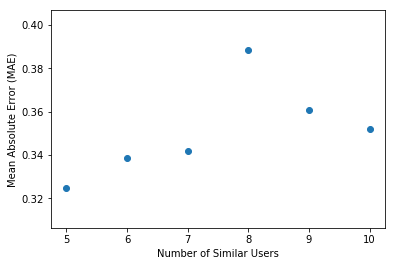

In [63]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

### ElasticNet

In [66]:
rand_state = 10
n_users_list = [5,6,7,8,9,10]

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.linear_model import ElasticNetCV
    model = ElasticNetCV(fit_intercept=False, normalize=False, cv=5, random_state=rand_state)
    model.fit(x, y)

    # Evaluate model on user's data 
    preds = model.predict(X_test)
    
    # unscale
    preds_unscaled = Y_scaler.inverse_transform(preds)
    y_test_unscaled = Y_scaler.inverse_transform(y_test)

    # evaluate results
    results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
    results_df.columns = ['predicted', 'actual']
    results_df['error'] = results_df['predicted'] - results_df['actual']
    results_df['abs_error'] = abs(results_df['error'])

    # Performance Metrics 
    mae = np.mean(results_df['abs_error'])
    print('MAE =', mae, "for n =", n)
    
    quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
    mae_list.append(mae)

MAE = 0.32466187447625017 for n = 5
MAE = 0.33598582624984386 for n = 6
MAE = 0.34394487961069814 for n = 7
MAE = 0.3848463935555247 for n = 8
MAE = 0.363384215909654 for n = 9
MAE = 0.3606381034996873 for n = 10


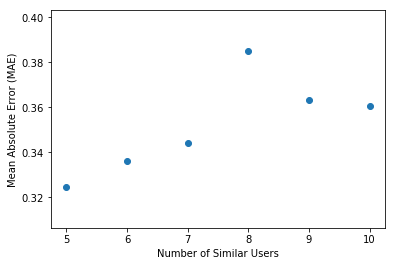

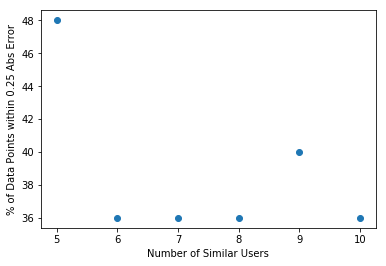

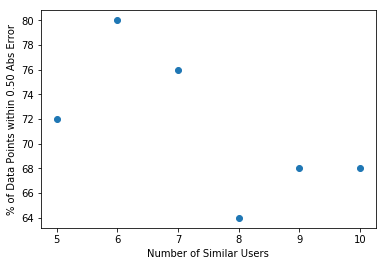

In [68]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

### Random Forest - Default Hyperparameters

In [ ]:
rand_state = 10
n_users_list = [5,6,7,8,9,10]

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV
    
    model = RandomForestRegressor(criterion='mae')
#     param_grid = {  "n_estimators": [10,20,50],
#                     "max_depth": [3,5,10,None],
#                     "max_features": [5,10,25,50,100],
#                     "min_samples_split": [2,5,7,10],
#                     "bootstrap": [True, False] }
#     grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, iid=False)
#     grid_search.fit(x, y)
    model.fit(x,y)

    # Evaluate model on user's data 
    preds = model.predict(X_test)
    
    # unscale
    preds_unscaled = Y_scaler.inverse_transform(preds)
    y_test_unscaled = Y_scaler.inverse_transform(y_test)

    # evaluate results
    results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
    results_df.columns = ['predicted', 'actual']
    results_df['error'] = results_df['predicted'] - results_df['actual']
    results_df['abs_error'] = abs(results_df['error'])

    # Performance Metrics 
    mae = np.mean(results_df['abs_error'])
    print('MAE =', mae, "for n =", n)
    
    quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
    mae_list.append(mae)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE = 0.374 for n = 5


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE = 0.3765 for n = 6


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE = 0.3559999999999999 for n = 7


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE = 0.44049999999999995 for n = 8


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

In [1]:
1

1

### Random Forest - Grid Search

In [14]:
rand_state = 10
# n_users_list = [5,6,7,8,9,10]
n_users_list = [5]

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []

for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV
    
    model = RandomForestRegressor(criterion='mae')
    param_grid = {  "n_estimators": [10,20,30],
                    "max_depth": [3,5, None],
                    "max_features": [5,10,25,50,100]}
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, iid=False)
    grid_search.fit(x, y)
    
    # Evaluate model on user's data 
    preds = grid_search.predict(X_test)
    
    # unscale
    preds_unscaled = Y_scaler.inverse_transform(preds)
    y_test_unscaled = Y_scaler.inverse_transform(y_test)

    # evaluate results
    results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
    results_df.columns = ['predicted', 'actual']
    results_df['error'] = results_df['predicted'] - results_df['actual']
    results_df['abs_error'] = abs(results_df['error'])

    # Performance Metrics 
    mae = np.mean(results_df['abs_error'])
    print('MAE =', mae, "for n =", n)
    
    quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
    mae_list.append(mae)

MAE = 0.37333333333333335 for n = 5


In [ ]:
rand_state = 10
# n_users_list = [5,6,7,8,9,10]
n_users_list = [6,7]

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV
    
    model = RandomForestRegressor(criterion='mae')
    param_grid = {  "n_estimators": [10,20,30],
                    "max_depth": [3,5, None],
                    "max_features": [5,10,25,50,100]}
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, iid=False)
    grid_search.fit(x, y)
    
    # Evaluate model on user's data 
    preds = grid_search.predict(X_test)
    
    # unscale
    preds_unscaled = Y_scaler.inverse_transform(preds)
    y_test_unscaled = Y_scaler.inverse_transform(y_test)

    # evaluate results
    results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
    results_df.columns = ['predicted', 'actual']
    results_df['error'] = results_df['predicted'] - results_df['actual']
    results_df['abs_error'] = abs(results_df['error'])

    # Performance Metrics 
    mae = np.mean(results_df['abs_error'])
    print('MAE =', mae, "for n =", n)
    
    quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
    mae_list.append(mae)

In [ ]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

### SVR, C = 0.5

In [ ]:
rand_state = 10
n_users_list = [5,6,7,8,9,10]
# n_users_list = [5]

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.svm import SVR
    
    for C in[0.5]:
        model = SVR(kernel='linear', epsilon=0.25, C=C)
        model.fit(x, y)

        # Evaluate model on user's data 
        preds = model.predict(X_test)

        # unscale
        preds_unscaled = Y_scaler.inverse_transform(preds)
        y_test_unscaled = Y_scaler.inverse_transform(y_test)

        # evaluate results
        results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
        results_df.columns = ['predicted', 'actual']
        results_df['error'] = results_df['predicted'] - results_df['actual']
        results_df['abs_error'] = abs(results_df['error'])

        # Performance Metrics 
        mae = np.mean(results_df['abs_error'])
        print('MAE =', mae, "for n =", n)

        quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
        half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
        mae_list.append(mae)

In [ ]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

In [23]:
### SVR, vary C

In [ ]:
rand_state = 10
n_users_list = [5,6,7,8,9,10]

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.svm import SVR
    
    for C in[0.0001, 0.1, 0.2, 0.5, 0.7, 1.0]:
        model = SVR(kernel='linear', epsilon=0.25, C=C)
        model.fit(x, y)

        # Evaluate model on user's data 
        preds = model.predict(X_test)

        # unscale
        preds_unscaled = Y_scaler.inverse_transform(preds)
        y_test_unscaled = Y_scaler.inverse_transform(y_test)

        # evaluate results
        results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
        results_df.columns = ['predicted', 'actual']
        results_df['error'] = results_df['predicted'] - results_df['actual']
        results_df['abs_error'] = abs(results_df['error'])

        # Performance Metrics 
        mae = np.mean(results_df['abs_error'])
        print('MAE =', mae, "for n =", n)

        quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
        half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
        mae_list.append(mae)

MAE = 0.3714930641967908 for n = 5
MAE = 0.34309884195283763 for n = 5
MAE = 0.34964021025327596 for n = 5
MAE = 0.35273459425617254 for n = 5
MAE = 0.3568241237799316 for n = 5
MAE = 0.3661357976451768 for n = 5
MAE = 0.3549869767813108 for n = 6
MAE = 0.3397654255193591 for n = 6
MAE = 0.3406475557066979 for n = 6
MAE = 0.3440107500901582 for n = 6
MAE = 0.34380005735454916 for n = 6
MAE = 0.34839206858371696 for n = 6
MAE = 0.3610493159840017 for n = 7
MAE = 0.34345068915366883 for n = 7
MAE = 0.3449070594023515 for n = 7


In [ ]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()